In [54]:
import segyio
import matplotlib.patches as patches
import pandas as pd
import re
import plotly.graph_objects as go
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon


In [4]:
def read_seismic_cube(file_path):
  """
  :param file_path: Путь к файлу
  :return: возвращает куб в виде списков по Inlines, Xlines и Sampels (координаты x, y, z)
  а также словарь сейсмотрасс, где ключ это координата пересечения Inlines и Xlines, а значение это список значений сейсмотрасс
  """
  with segyio.open(file_path, 'r') as segyfile:
      x = list(segyfile.ilines)
      y = list(segyfile.xlines)
      z_0 = list(segyfile.samples)
      z = list()
      for i in range(len(z_0)):
          z.append(int(z_0[i]))
      cube = segyio.tools.cube(segyfile)
      #traces = {f"{x[i]}_{y[j]}": cube[i][j][:] for i in range(len(x)) for j in range(len(y))}
  return x, y, z

In [5]:
file_path = 'C:/HV/Seismic/datas/Cube_TWT.segy'
inlines, xlines, samples = read_seismic_cube(file_path)

In [ ]:
cube = []
for i in range(len(xlines)):
    for j in range(len(inlines)):
        cube.append([xlines[i], inlines[j]])

In [75]:
print(cube[0:10])

[[5001, 1001], [5001, 1002], [5001, 1003], [5001, 1004], [5001, 1005], [5001, 1006], [5001, 1007], [5001, 1008], [5001, 1009], [5001, 1010]]


In [67]:
def read_seismic_cube_real(file_path):
    """
  :param file_path: Путь к файлу
  :return: возвращает реальные координаты x, y
  """
    with segyio.open(file_path, 'r') as segyfile:
        x = list(segyfile.ilines)
        y = list(segyfile.xlines)
        z = list(segyfile.samples)
        coord_x = set()
        coord_y = set()
        cube_coord = []
        for i in range(len(x)):
            for j in range(len(y)):
                index = i * len(y) + j
                trace_header = segyfile.header[index]
                cube_coord.append([trace_header[segyio.TraceField.SourceX], trace_header[segyio.TraceField.SourceY]])
                #coord_x.add(trace_header[segyio.TraceField.SourceX])
                #coord_y.add(trace_header[segyio.TraceField.SourceY])
    return cube_coord

In [68]:
file_path = 'C:/HV/Seismic/datas/Cube_TWT.segy'
real_cube = read_seismic_cube_real(file_path)

In [117]:
table_result = [['Проверка по оси ХУ', 'TWT_cube', 'Volume_attribute_1', 'Volume_attribute_2', 'top_surface_TWT', 'bot_surface_TWT', 'Surface_attribute', 'Fault_polygons_TWT', 'top_surface_TVDSS', 'bot_surface_TVDSS', 'lateral_trend', 'model_area_boundary', 'licence_area_boundary'],
                ['TWT_cube', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], 
                ['Volume_attribute 1', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], 
                ['Volume_attribute 2', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'],
                ['top_surface_TWT', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], 
                ['bot_surface_TWT', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'],
                ['Surface_attribute', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], 
                ['Fault_polygons_TWT', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], 
                ['top_surface_TVDSS', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], 
                ['bot_surface_TVDSS', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], 
                ['lateral_trend', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], 
                ['model_area_boundary', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], 
                ['licence_area_boundary', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'] 
                ]

In [151]:

def peresechenie(coords_polygon1, coords_polygon2, name_polygon1='Полигон 1', name_polygon2='Полигон 2'):
    # Создаем полигоны
    polygon1 = Polygon(coords_polygon1)
    polygon2 = Polygon(coords_polygon2)
    
    # Находим пересечение
    intersection = polygon1.intersection(polygon2)
    
    # Вычисляем площади
    area_polygon1 = polygon1.area
    area_polygon2 = polygon2.area
    area_intersection = intersection.area
    
    # Выводим общую площадь пересечения
    if intersection.is_empty:
        print("Полигоны не пересекаются.")
    else:
        print("Общая площадь пересечения:", area_intersection)
    
        # Вычисляем процент пересечения
        percent_intersection_polygon1 = (area_intersection / area_polygon1) * 100
        percent_intersection_polygon2 = (area_intersection / area_polygon2) * 100
    
        print(f"Процент пересечения относительно {name_polygon1}: {percent_intersection_polygon1:.2f}%")
        print(f"Процент пересечения относительно {name_polygon2}: {percent_intersection_polygon2:.2f}%")
        
    # Визуализация
    fig, ax = plt.subplots()

    # Отображаем первый полигон
    x1, y1 = polygon1.exterior.xy
    ax.fill(x1, y1, alpha=0.5, fc='blue', label=name_polygon1)

    # Отображаем второй полигон
    x2, y2 = polygon2.exterior.xy
    ax.fill(x2, y2, alpha=0.5, fc='red', label=name_polygon2)

    # Отображаем пересечение
    if not intersection.is_empty:
        x_int, y_int = intersection.exterior.xy
        ax.fill(x_int, y_int, alpha=0.5, fc='green', label='Пересечение')

    # Настройки графика
    ax.set_title(f'Пересечение: {name_polygon1} и {name_polygon2}')
    ax.set_xlabel('Xlines')
    ax.set_ylabel('Inlines')
    ax.legend()
    ax.set_aspect('equal', adjustable='box')
    plt.grid()
    plt.show()
    
    return percent_intersection_polygon1, percent_intersection_polygon2


In [119]:
def create_convex_hull(coords):
    """
    Создает полигон (выпуклую оболочку) из списка координат.

    :param coords: Список координат в формате [[x1, y1], [x2, y2], ...]
    :return: Объект Polygon, представляющий выпуклую оболочку
    """
    if len(coords) < 3:
        raise ValueError("Для создания полигона необходимо как минимум 3 точки.")

    # Преобразуем список координат в массив NumPy 
    points = np.array(coords)

    # Находим выпуклую оболочку
    hull = ConvexHull(points)

    # Извлекаем координаты вершин выпуклой оболочки 
    hull_points = points[hull.vertices]

    # Создаем полигон
    polygon = Polygon(hull_points)
    return polygon

In [120]:
TWT_cube = create_convex_hull(cube)
TWT_cube_real = create_convex_hull(real_cube)

In [121]:
#ридер для объемных атрибутов
def rider(file_path):
    with segyio.open(file_path, 'r') as segyfile:
        y = [i for i in segyfile.xlines]
        x = [i for i in segyfile.ilines]
        cube_coord = []
        for i in range(len(y)):
            for j in range(len(x)):
                cube_coord.append([y[i], x[j]])
    return cube_coord

In [122]:
Volume_attribute_1 = create_convex_hull(rider('C:/HV/Seismic/datas/Volume_attribute1_RMS_TWT.segy'))

In [123]:
Volume_attribute_2 = create_convex_hull(rider('C:/HV/Seismic/datas/Volume_attribute2_Amplitude_contrast_TWT.segy'))

Общая площадь пересечения: 379431.0
Процент пересечения относительно TWT_cube: 100.00%
Процент пересечения относительно Volume_attribute_1: 100.00%


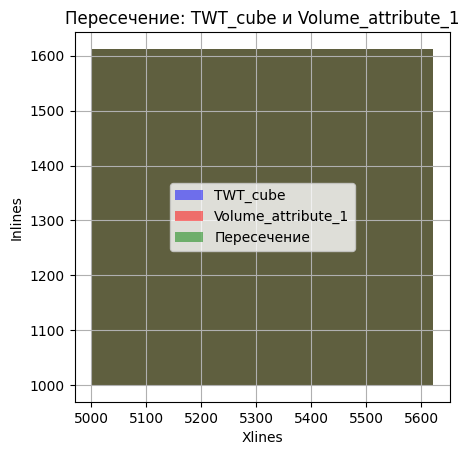

In [152]:
#a, b = peresechenie(TWT_cube, Volume_attribute_1, 'TWT_cube', 'Volume_attribute_1')
table_result[1][2], table_result[2][1] = peresechenie(TWT_cube, Volume_attribute_1, 'TWT_cube', 'Volume_attribute_1')

Общая площадь пересечения: 379431.0
Процент пересечения относительно TWT_cube: 100.00%
Процент пересечения относительно Volume_attribute_2: 100.00%


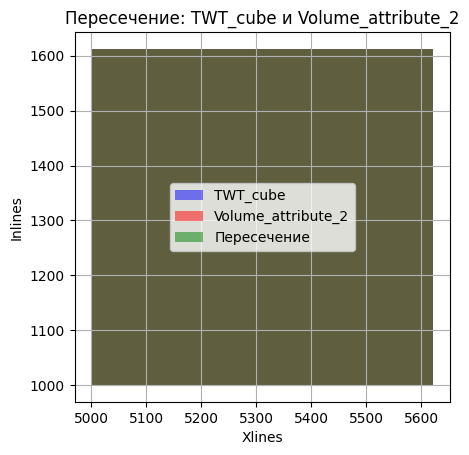

In [153]:
table_result[1][3], table_result[3][1] = peresechenie(TWT_cube, Volume_attribute_2, 'TWT_cube', 'Volume_attribute_2')

In [126]:
# ридер для карты кровли и подошвы
def gorizont_coord(file):
    with open(file, 'r') as f:
        gorizon = []
        for line in f:
            if not line.startswith('#'):  # Пропуск строк, начинающихся с #
                x, y, z, *rest = line.split()  # Разбиение строки по столбцам
                x = int(x.split('.')[0])  # Получение целочисленного значения из первого столбца
                y = int(y.split('.')[0])  # Получение целочисленного значения из второго столбца
                #z = int(z.split('.')[0])  # Получение целочисленного значения из третьего столбца
                gorizon.append([x, y])  # Добавление данных в словарь

    return gorizon

In [127]:
Top_TWT = create_convex_hull(gorizont_coord('C:/HV/Seismic/datas/TWT_Top_U1.txt'))
Bottom_TWT = create_convex_hull(gorizont_coord('C:/HV/Seismic/datas/TWT_Bottom_U1.txt'))

Общая площадь пересечения: 198787500.0
Процент пересечения относительно TWT_cube_real: 83.93%
Процент пересечения относительно Top_TWT: 100.00%


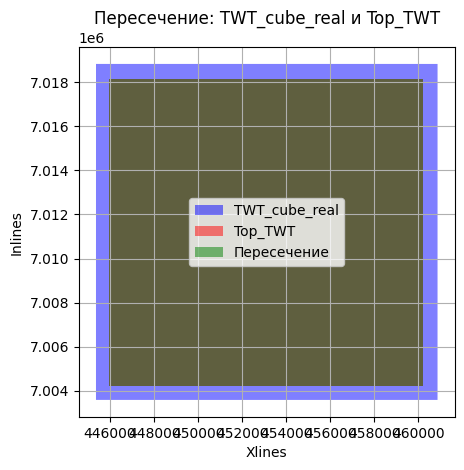

In [128]:
table_result[1][4], table_result[4][1] = peresechenie(TWT_cube_real, Top_TWT, 'TWT_cube_real', 'Top_TWT')

Общая площадь пересечения: 198787500.0
Процент пересечения относительно TWT_cube_real: 83.93%
Процент пересечения относительно Bottom_TWT: 100.00%


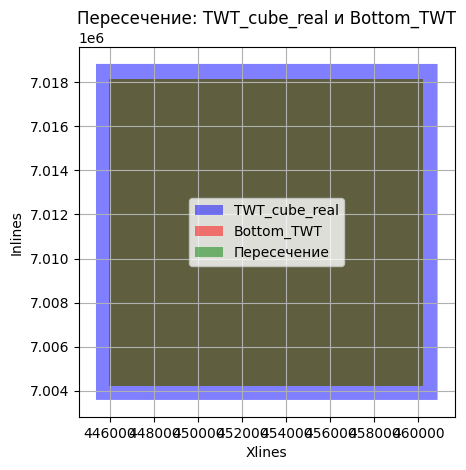

In [129]:
table_result[1][5], table_result[5][1] = peresechenie(TWT_cube_real, Bottom_TWT, 'TWT_cube_real', 'Bottom_TWT')

In [130]:
Surface_attribute = create_convex_hull(gorizont_coord('C:/HV/Seismic/datas/Surface_attribute_AmplitudeContrast_HalfEnergy_TWT.txt'))

Общая площадь пересечения: 198787500.0
Процент пересечения относительно TWT_cube_real: 83.93%
Процент пересечения относительно Surface_attribute: 100.00%


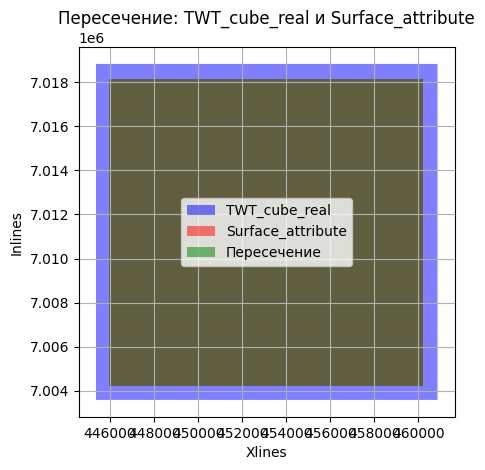

In [131]:
table_result[1][6], table_result[6][1] = peresechenie(TWT_cube_real, Surface_attribute, 'TWT_cube_real', 'Surface_attribute')

Общая площадь пересечения: 198787500.0
Процент пересечения относительно TWT_cube_real: 83.93%
Процент пересечения относительно top_surface_TVDSS: 100.00%


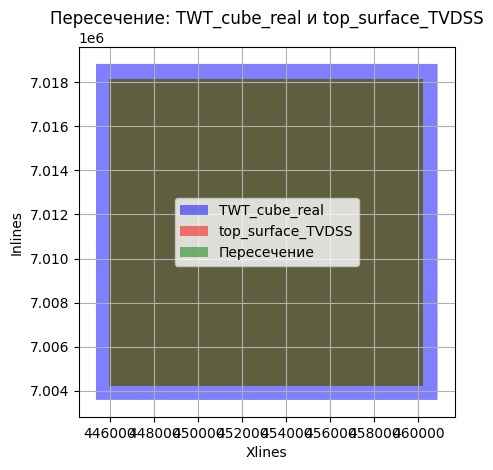

In [133]:
top_surface_TVDSS = create_convex_hull(gorizont_coord('C:/HV/Seismic/datas/TVDSS_Top_U1.txt'))
table_result[1][8], table_result[8][1] = peresechenie(TWT_cube_real, top_surface_TVDSS, 'TWT_cube_real', 'top_surface_TVDSS')

Общая площадь пересечения: 198787500.0
Процент пересечения относительно TWT_cube_real: 83.93%
Процент пересечения относительно bot_surface_TVDSS: 100.00%


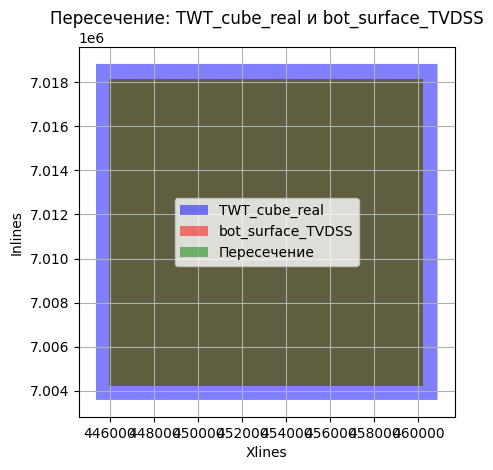

In [138]:
bot_surface_TVDSS = create_convex_hull(gorizont_coord('C:/HV/Seismic/datas/TVDSS_Bottom_U1.txt'))
table_result[1][9], table_result[9][1] = peresechenie(TWT_cube_real, bot_surface_TVDSS, 'TWT_cube_real', 'bot_surface_TVDSS')

Общая площадь пересечения: 198787500.0
Процент пересечения относительно TWT_cube_real: 83.93%
Процент пересечения относительно lateral_trend: 100.00%


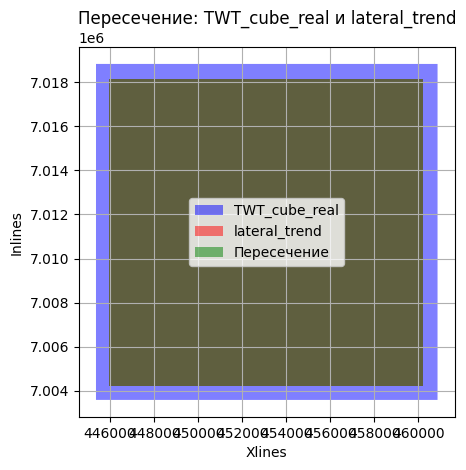

In [139]:
lateral_trend = create_convex_hull(gorizont_coord('C:/HV/Seismic/datas/Effective_thickness_calculated_by_surface_attributes.txt'))
table_result[1][10], table_result[10][1] = peresechenie(TWT_cube_real, lateral_trend, 'TWT_cube_real', 'lateral_trend')

In [137]:
#для model_area_boundary и licence_area_boundary
def read_coordinates(file_path):
    coordinates = []
    
    with open(file_path, 'r') as file:
        for line in file:
            # Убираем пробелы и разделяем строку на элементы
            parts = line.strip().split()
            
            # Проверяем, что строка не является строкой конца файла
            if parts[0] == '999.0' and parts[1] == '999.0' and parts[2] == '999.0':
                break
            
            # Преобразуем первую и вторую колонки в int и добавляем в список
            x = int(float(parts[0]))  # Преобразуем в float, а затем в int
            y = int(float(parts[1]))  # Преобразуем в float, а затем в int
            
            coordinates.append([x, y])
    
    return coordinates


Общая площадь пересечения: 201027798.5
Процент пересечения относительно TWT_cube_real: 84.88%
Процент пересечения относительно model_area_boundary: 100.00%


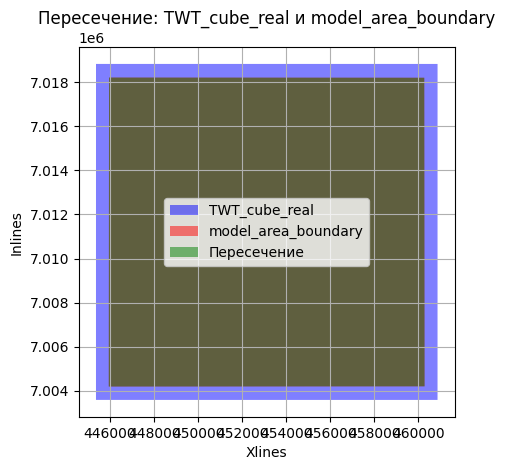

In [140]:
model_area_boundary = create_convex_hull(read_coordinates('C:/HV/Seismic/datas/Model_area_boundary_IRAP_ASCII.txt'))
table_result[1][11], table_result[11][1] = peresechenie(TWT_cube_real, model_area_boundary, 'TWT_cube_real', 'model_area_boundary')

Общая площадь пересечения: 102239533.0
Процент пересечения относительно TWT_cube_real: 43.17%
Процент пересечения относительно licence_area_boundary: 100.00%


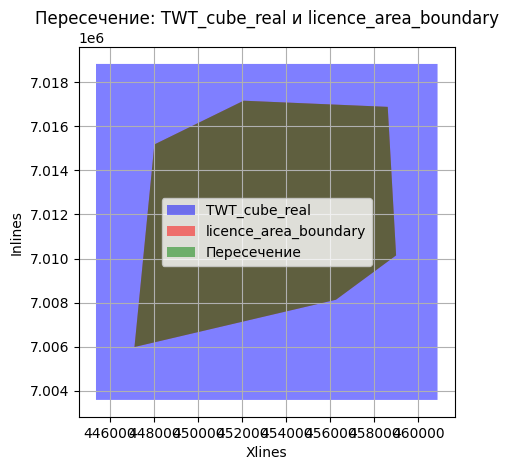

In [141]:
licence_area_boundary = create_convex_hull(read_coordinates('C:/HV/Seismic/datas/Licence_area_boundary_IRAP_ASCII.txt'))
table_result[1][12], table_result[12][1] = peresechenie(TWT_cube_real, licence_area_boundary, 'TWT_cube_real', 'licence_area_boundary')

In [167]:
# ридер для разломов
def process_files(directory):
    files = os.listdir(directory)
    result = {}

    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(directory, file), 'r') as f:
                data = []
                for line in f:
                    fields = line.split()
                    if len(fields) >= 8:
                        x = int(float(fields[3]))
                        y = int(float(fields[4]))
                        z = -int(float(fields[5]))
                        t = int(fields[7])
                        data.append([x, y, z, t])
                result[file] = data
    #return result
    
    
    """
    Сборка координат в один список попарно
    Если точек больше 2, то берется минимальное и максимальное значение по глубинам
    Если точка 1, то она не учитывается в разломах
    """
    faults_final = {}

    for key in result:
        dop_spisok = []
        z_spisok = []
        faults_final[key] = []

        for i in range(len(result[key])):
            if len(dop_spisok) == 0:
                dop_spisok.append(result[key][i])
                z_spisok.append(result[key][i][2])
            elif len(dop_spisok) == 1:
                if dop_spisok[0][3] == result[key][i][3]:
                    dop_spisok.append(result[key][i])
                    z_spisok.append(result[key][i][2])
                else:
                    dop_spisok.clear()
                    z_spisok.clear()
                    dop_spisok.append(result[key][i])
                    z_spisok.append(result[key][i][2])
            elif len(dop_spisok) == 2:
                if dop_spisok[0][3] == result[key][i][3]:
                    dop_spisok.append(result[key][i])
                    z_spisok.append(result[key][i][2])
                else:
                    
                    #faults_final.append(dop_spisok[:])
                    faults_final[key].append(dop_spisok[:])
                    dop_spisok.clear()
                    z_spisok.clear()
                    dop_spisok.append(result[key][i])
                    z_spisok.append(result[key][i][2])
            else:
                if dop_spisok[0][3] == result[key][i][3]:
                    dop_spisok.append(result[key][i])
                    z_spisok.append(result[key][i][2])
                else:
                    faults_final[key].append([dop_spisok[z_spisok.index(min(z_spisok))], dop_spisok[z_spisok.index(max(z_spisok))]])
                    dop_spisok.clear()
                    z_spisok.clear()
                    dop_spisok.append(result[key][i])
                    z_spisok.append(result[key][i][2])  
    return faults_final
    
    

In [168]:
directory = 'C:/HV/Seismic/datas/Faults_TWT_Charisma_fault_sticks_ASCII'
faults = process_files(directory)

In [169]:
print(faults)

{'Graben10_E.txt': [[[451094, 7007473, -1900, 1], [450184, 7007473, -2505, 1]], [[451363, 7007223, -1871, 2], [450364, 7007223, -2489, 2]], [[450889, 7007723, -1888, 3], [450018, 7007723, -2511, 3]], [[450697, 7007973, -1867, 4], [449826, 7007973, -2511, 4]], [[450480, 7008222, -1873, 5], [449646, 7008223, -2496, 5]]], 'Graben10_W.txt': [[[448545, 7007723, -1888, 1], [449288, 7007723, -2509, 1]], [[448673, 7007473, -1894, 2], [449468, 7007473, -2492, 2]], [[448404, 7007973, -1875, 3], [449096, 7007973, -2488, 3]], [[448264, 7008223, -1877, 4], [448917, 7008223, -2491, 4]], [[448162, 7008472, -1844, 5], [448814, 7008472, -2508, 5]], [[448073, 7008722, -1878, 6], [448648, 7008722, -2514, 6]], [[448866, 7007223, -1887, 7], [449646, 7007223, -2483, 7]]], 'Graben11_E.txt': [[[451363, 7006474, -1893, 1], [450530, 7006474, -2499, 1]], [[451554, 7006224, -1878, 2], [450748, 7006224, -2488, 2]], [[451196, 7006724, -1868, 3], [450428, 7006724, -2495, 3]], [[451004, 7006973, -1868, 4], [450184, 7

In [96]:
#Вывод таблицы 
data = table_result

# Определяем ширину столбцов
column_widths = [max(len(str(item)) for item in column) for column in zip(*data)]

for row in data:
    print(" | ".join(f"{str(item):<{column_widths[i]}}" for i, item in enumerate(row)))


___                   | TWT_cube | Volume_attribute_1 | Volume_attribute_2 | top_surface_TWT | bot_surface_TWT | Surface_attribute | Fault_polygons_TWT | top_surface_TVDSS | bot_surface_TVDSS | lateral_trend | model_area_boundary | licence_area_boundary
TWT_cube              | x        | 100.0              | x                  | x               | x               | x                 | x                  | x                 | x                 | x             | x                   | x                    
Volume_attribute 1    | 100.0    | x                  | x                  | x               | x               | x                 | x                  | x                 | x                 | x             | x                   | x                    
Volume_attribute 2    | x        | x                  | x                  | x               | x               | x                 | x                  | x                 | x                 | x             | x                   | x     

In [65]:
data = table_result

# Создаем DataFrame из данных
df = pd.DataFrame(data[1:], columns=data[0])

# Записываем DataFrame в файл Excel
output_file = "output.xlsx"
df.to_excel(output_file, index=False)

print(f"Данные успешно записаны в файл {output_file}")

Данные успешно записаны в файл output.xlsx
